In [1]:
import pandas as pd

data_set = pd.read_csv(r'D:\github\CIC-IDS-attack-detecte\data_set.csv')

In [2]:
data_set 

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827872,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827873,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2827874,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
data_set[' Label'].value_counts()

 Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [4]:
#TASK.1 Binary_classification

data_set[' Label'] = data_set[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


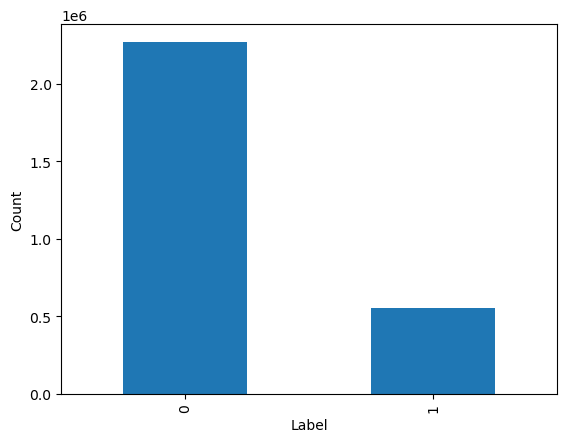

In [5]:
import matplotlib.pyplot as plt

data_set[' Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:
x_data = data_set.drop([' Label'], axis=1)
y_data = data_set[' Label']

In [7]:
from sklearn.model_selection import train_test_split

x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [8]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix

model_xgb = xgb.XGBClassifier(tree_method='gpu_hist')

model_xgb.fit(x_train_70, y_train_70)

y_pred_xgb = model_xgb.predict(x_test_70)

report_xgb = classification_report(y_test_70, y_pred_xgb)

accuracy_xgb = accuracy_score(y_test_70, y_pred_xgb)

cm_xgb = confusion_matrix(y_test_70, y_pred_xgb)

print(f"XGBoost accuracy : {accuracy_xgb}")
print(report_xgb)
print(f"Confusion Matrix:\n{cm_xgb}")

c:\Users\82106\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\82106\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:44:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\82106\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:44:30] WARNING: C:\buildkite-agen

XGBoost accuracy : 0.9992491421714526
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681014
           1       1.00      1.00      1.00    167349

    accuracy                           1.00    848363
   macro avg       1.00      1.00      1.00    848363
weighted avg       1.00      1.00      1.00    848363

Confusion Matrix:
[[680578    436]
 [   201 167148]]


In [9]:
import shap

shap.initjs()

In [10]:
explainer = shap.Explainer(model_xgb, x_train_70)

In [11]:
shap_values = explainer.shap_values(x_test_70)

100%|===================| 847963/848363 [33:20<00:00]        

In [12]:
shap_values

array([[-3.36649036, -0.49431995,  0.16341205, ...,  0.        ,
         0.15375877,  0.59816178],
       [ 2.02538931, -0.05134451, -0.02014119, ...,  0.        ,
        -0.00999281, -0.21612196],
       [-1.72121319, -0.35098349, -0.23975867, ...,  0.        ,
        -0.11167809,  0.11884715],
       ...,
       [-4.56151997, -0.40980179, -0.20541798, ...,  0.        ,
         0.10106665,  0.80744795],
       [-2.09546477, -0.30396567, -0.31387236, ...,  0.23094912,
         0.13587407,  0.13688712],
       [-4.98871875, -0.47624134, -0.14868505, ...,  0.02235482,
         0.06796093,  0.13948753]])

In [14]:
y_test_70

176092     0
264770     0
205057     0
1367891    0
2717855    0
          ..
68382      1
2486888    0
2244259    0
2627120    0
164999     0
Name:  Label, Length: 848363, dtype: int64

In [16]:
x_test_70

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
176092,38345,11045994,1,5,6,30,6,6,6.000000,0.000000,...,0,20,3.759300e+04,0.000000e+00,37593,37593,11000000.0,0.000000e+00,11000000,11000000
264770,80,153148,3,0,0,0,0,0,0.000000,0.000000,...,0,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
205057,443,61229688,20,18,2482,7584,596,0,124.100000,186.521312,...,19,20,1.647063e+05,2.796782e+05,735597,50451,9994740.5,1.012738e+04,10000000,9976355
1367891,53,1168,2,2,94,220,47,47,47.000000,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
2717855,42657,43,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68382,80,43653,3,6,26,11601,20,0,8.666667,10.263203,...,2,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
2486888,53,31688,1,1,42,138,42,42,42.000000,0.000000,...,0,40,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
2244259,40884,98486647,7,6,11595,361,5792,0,1656.428571,2120.732252,...,4,32,1.394900e+04,0.000000e+00,13949,13949,98300000.0,0.000000e+00,98300000,98300000
2627120,443,87138209,123,188,32479,113334,3241,0,264.056911,693.500060,...,122,20,2.381112e+06,3.185083e+06,4633306,128918,41100000.0,2.440000e+07,58300000,23900000


In [18]:
shap.force_plot(explainer.expected_value, shap_values[0], x_test_70.iloc[0,:])

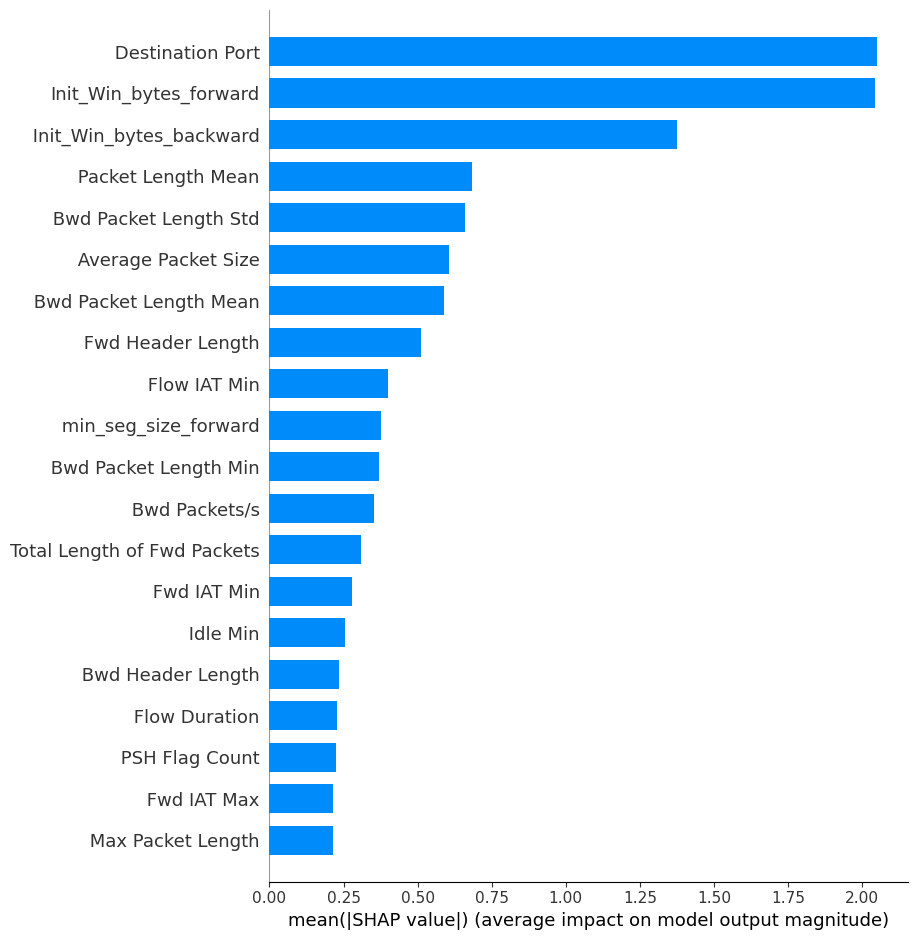

In [23]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, x_test_70, plot_type="bar", show=False)

plt.gcf().set_figwidth(10) 
plt.show()

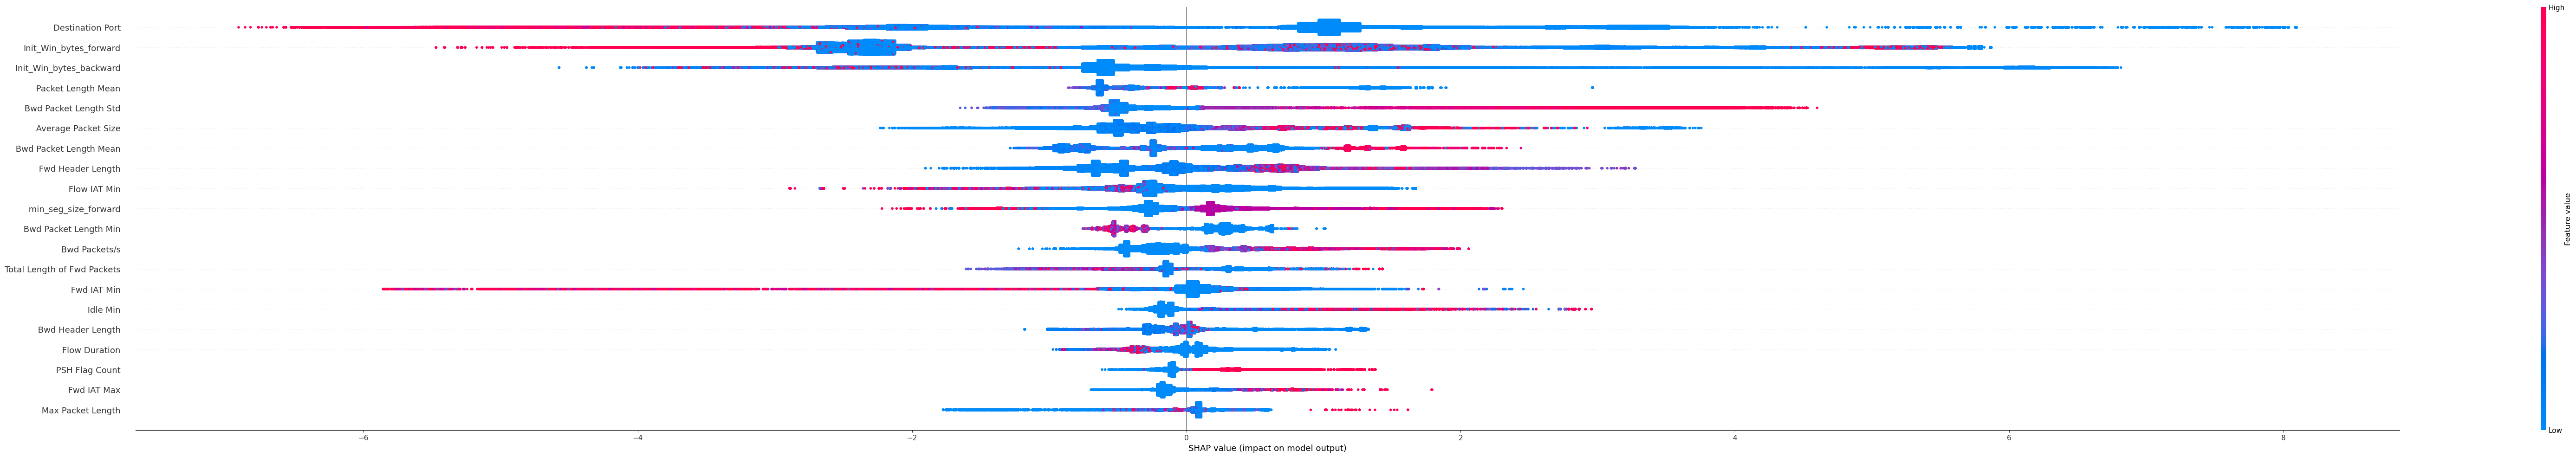

In [28]:
shap.summary_plot(shap_values, x_test_70, show=False)
plt.gcf().set_figwidth(100) 
plt.gcf().set_figheight(10)  
plt.show()


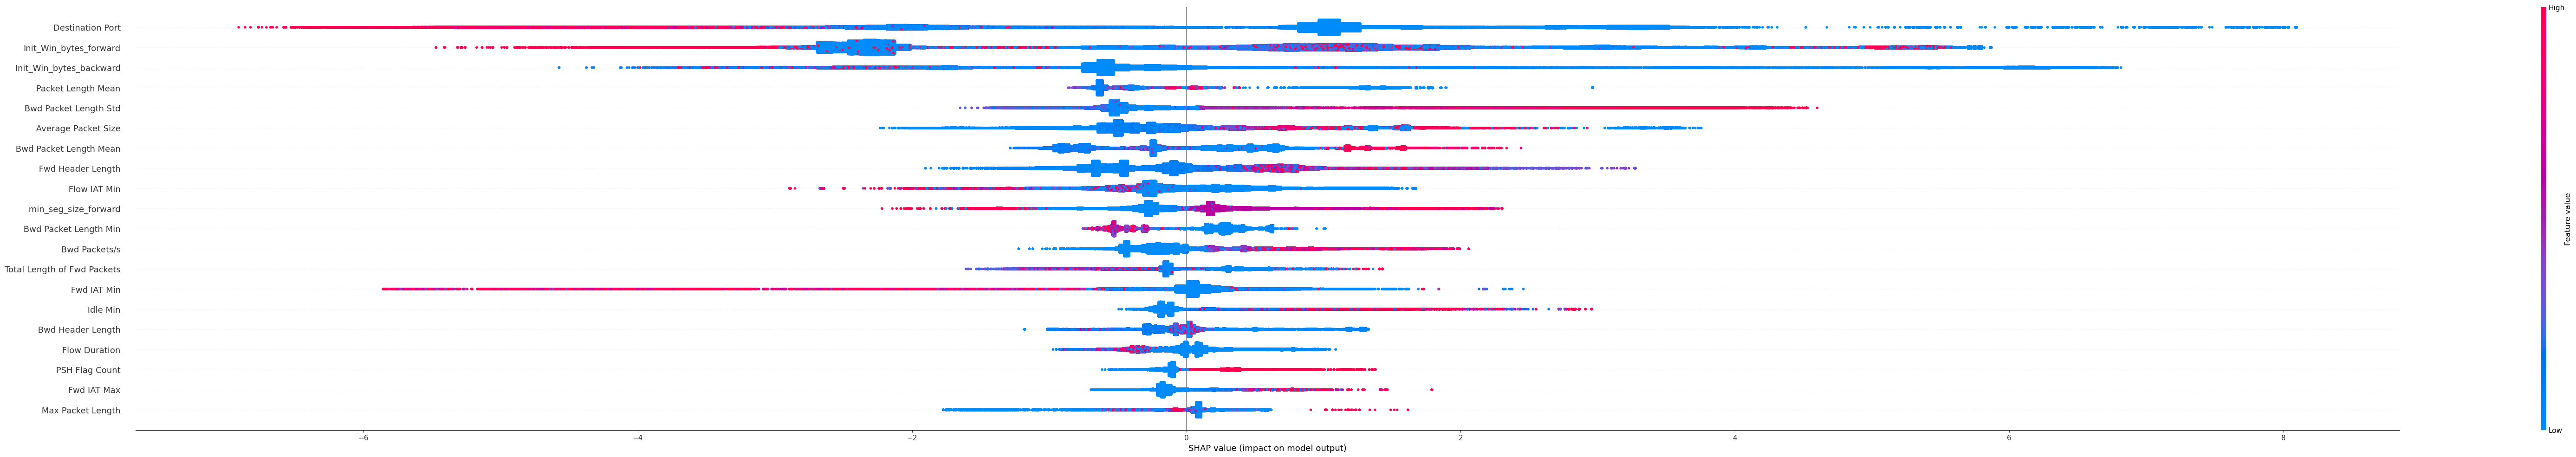

In [29]:
shap.summary_plot(shap_values, x_test_70, max_display=None, show=False)
plt.gcf().set_figwidth(100) 
plt.gcf().set_figheight(10)  
plt.show()

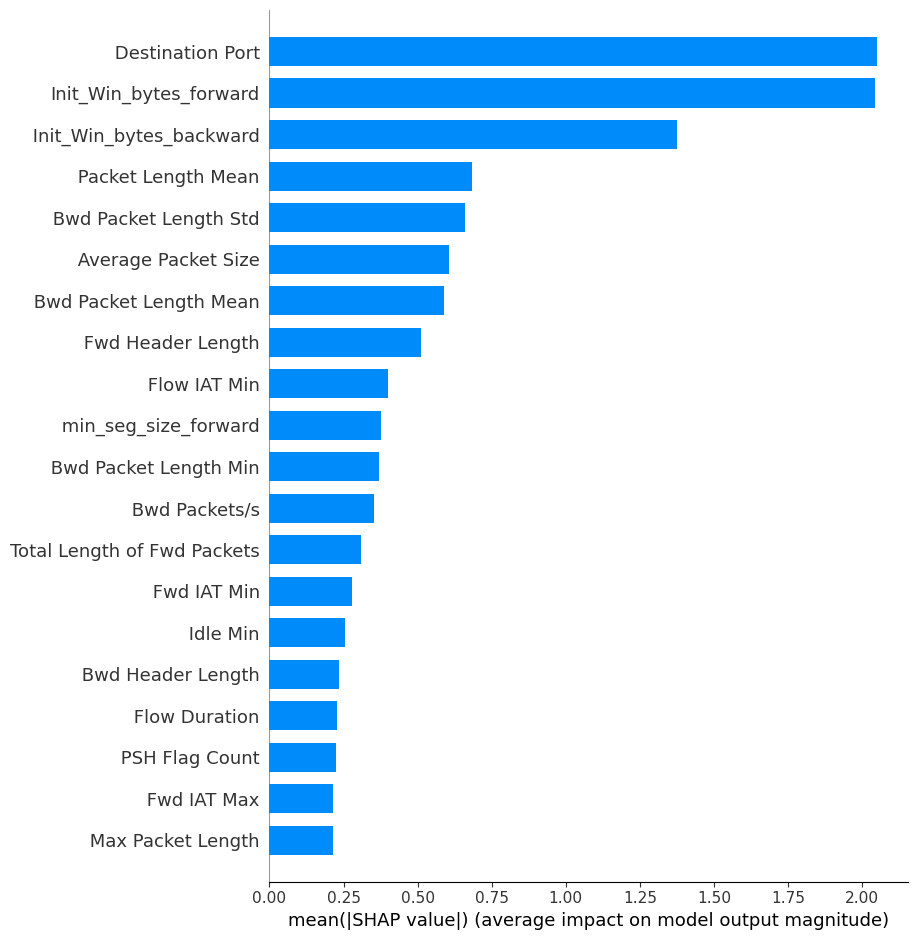

In [30]:
shap.summary_plot(shap_values, x_test_70, plot_type="bar", max_display=None, show=False)

plt.gcf().set_figwidth(10) 
plt.show()

In [35]:
import numpy as np

np.save('Binary_shap_values.npy', shap_values)

In [36]:
model_xgb.save_model('Binary_xgboost_model.json')